## Importing Libraries



In [1]:
# importing my custom module
import allcustommodules as sidra
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import cross_val_score
import warnings
import train_test_split_v2 as tts2
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import Visualization_for_misclassifications as visual

## Loading Data

In [2]:
filename = "D:/PRESC/PRESC/datasets/vehicles.csv"
dataset = pd.read_csv(filename)
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


### Exploring Dataset
General shape of data set, attributes list and categories list

In [3]:
sidra.data_stats(dataset)

=========== SOME STATS of Dataset ===========
Shape of the dataset: (846, 19)

List of attribute columns ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO', 'Class']


List of Categories  ['van' 'saab' 'bus' 'opel'] 



#### Checking for anomalies and if upsampling of data is required 
Verifying that dataset is homogenous (that is there are almost equal number of datapoints belonging to each category)

In [4]:
dataset.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
#checking the type of each attribute and seeing if we have missing values:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

As you can see from above result, there are 846 entries for the dataset and each column has 846 values as well, this means that we don't have any missing values

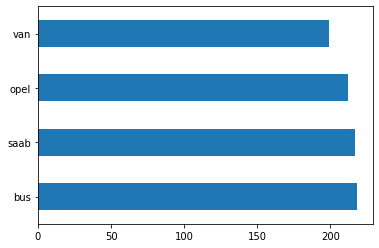

In [6]:
dataset['Class'].value_counts().plot(kind='barh')

you can see from the graph above that almost all classes have equal samples in the dataset (except Class: Van which has a slightly lesser representation, if the result of classifier shows missclassification for/of this class, we will try to augument its representation of this class in dataset in future)

## Tokenizing Target Column
Since random forest algo can only predict numbers we are tokenizing Class column/ Target values to numbers.

In [7]:
definitions = sidra.tokenize_target_column(dataset)

Updated tokenize 'Class' column - first 5 values
0    0
1    0
2    1
3    0
4    2
Name: Class, dtype: int64
Distinct Tokens used for converting Class column to integers
Index(['van', 'saab', 'bus', 'opel'], dtype='object')


## Train and test data separation
Here I am separating target column from the rest of the dataset to form X: Training data and y: labels

In [8]:
X, y = sidra.training_data_and_target_Label_split(dataset)

## Model Selection
Lets select a  few models and try to find the best, the major critieria for this task is a model that has good accuracy (overall model performance) as well as good F1 score (since it is a classification task, we would like a lower number of false positives as well as lower number of false negatives) I have selected a set of model: Random Forest Classifier, K Neighbor Classifier, RBF SVM, Naive Bayes, Logistic Regression, Decision Tree, lets draw 2 tables, a table that shows comapartive accuracy of models and the other comparative f1 score of each model. We will select the model with a good F1 score + good accuray



## Model Evaluation

Evaluating performance of various classifier:
 Random Forest Classifier, K Neighbor Classifier, RBF SVM, Naive Bayes, Logistic Regression, Decision Tree
 


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

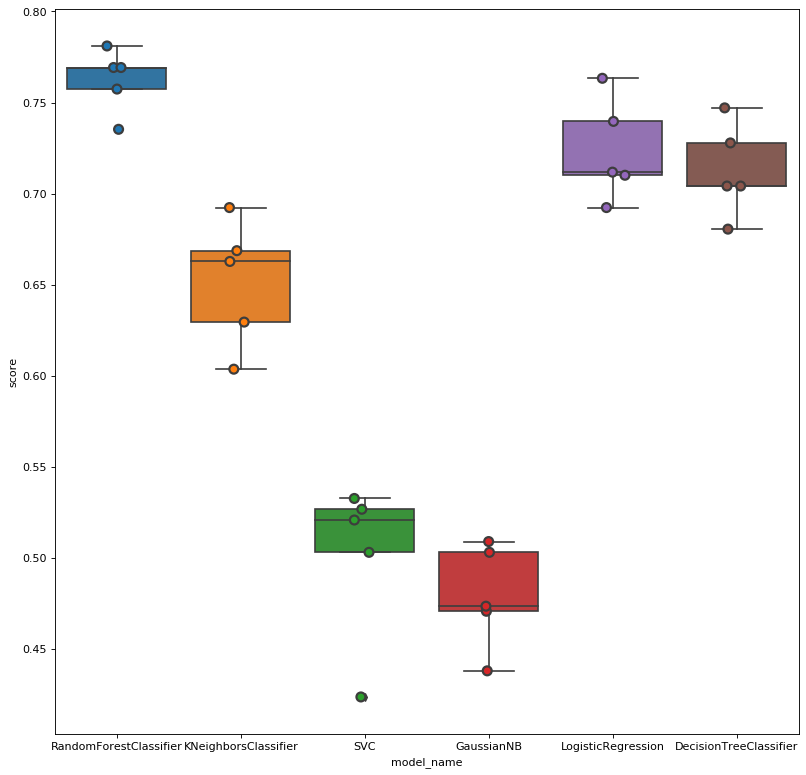

===========================  Showing Accuracy Vs. Models ======================


In [9]:
sidra.model_evaluation(X, y) 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
## since I am using default hyperparameter for each of model, we are seeing warning, which can be ignored.
print( "===========================  Showing Accuracy Vs. Models ======================")

Evaluating performance of various classifier:
 Random Forest Classifier, K Neighbor Classifier, RBF SVM, Naive Bayes, Logistic Regression, Decision Tree
 


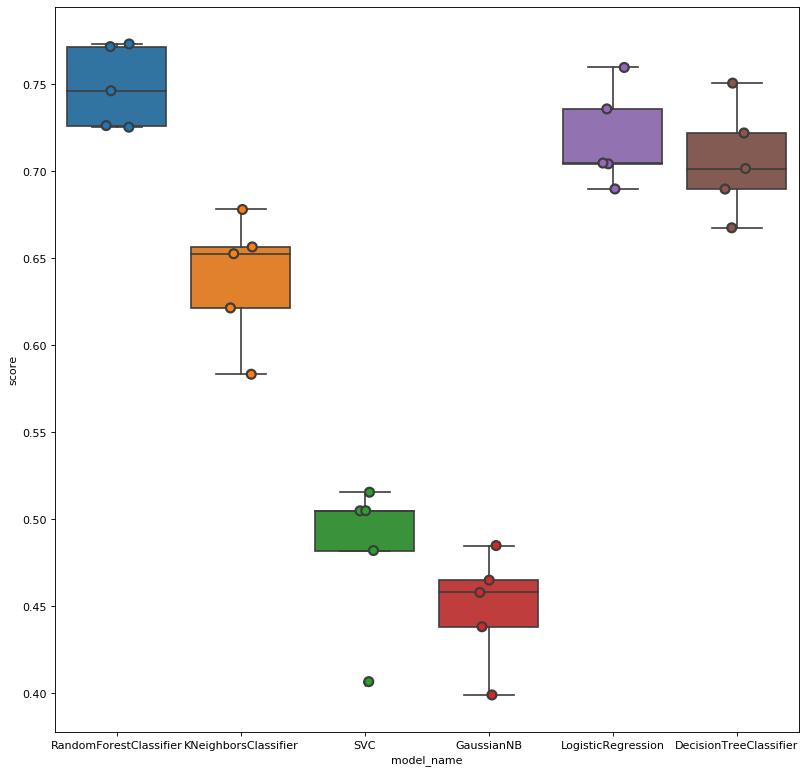

===========================  Showing f1 score Vs. Models ======================


In [10]:
sidra.model_evaluation(X, y, scoring= 'f1_macro')  #f1 macro as simple f1 is for binary targets as per sklean docs
print( "===========================  Showing f1 score Vs. Models ======================")

I am seeing Random Forest classifier with top aaccuracy and top f1 score among all the other models, so now lets try to tune its hyperparameters

## Best train/test split ratio for selected model


In [11]:
estimator = RandomForestClassifier() #using default params for now
cv = 5
table = tts2.train_test_split_table_scores(estimator, X, y, cv)
table

,Train Percent,Test Percent,Split1,Split2,Split3,Split4,Split5,Training Scores Mean,Testing Scores Mean
0,7.92,92.080378,1.0,1.0,1.0,1.0,1.0,1.0,0.662033
1,25.89,74.113475,1.0,1.0,1.0,1.0,1.0,1.0,0.718684
2,43.85,56.146572,1.0,1.0,1.0,1.0,1.0,1.0,0.743557
3,61.82,38.179669,1.0,1.0,1.0,1.0,1.0,1.0,0.744678
4,79.91,20.094563,1.0,1.0,1.0,1.0,1.0,1.0,0.749405


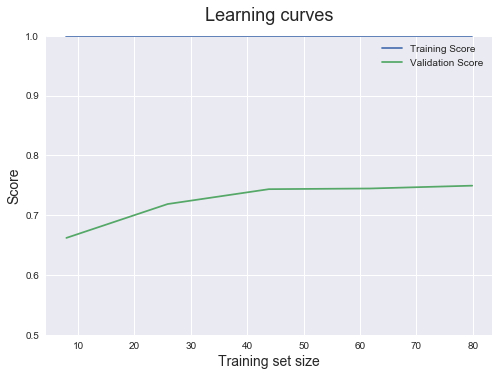

In [12]:
tts2.visual_tain_test_split_score(table)

In above graph and table you can see that the model with default parameters is extremely overfitting training data, lets reduce no. of trees as it will reduce overfitting

In [13]:
estimator = RandomForestClassifier(n_estimators=5) #lets start from 5 trees
estimator.fit(X,y)
cv = 5
table = tts2.train_test_split_table_scores(estimator, X, y, cv=5)
table

,Train Percent,Test Percent,Split1,Split2,Split3,Split4,Split5,Training Scores Mean,Testing Scores Mean
0,7.92,92.080378,0.955224,0.985075,0.940299,0.910448,0.940299,0.946269,0.560251
1,25.89,74.113475,0.968037,0.972603,0.981735,0.940639,0.931507,0.958904,0.666711
2,43.85,56.146572,0.964960,0.964960,0.948787,0.973046,0.975741,0.965499,0.704483
3,61.82,38.179669,0.973231,0.961759,0.977055,0.969407,0.967495,0.969790,0.709217
4,79.91,20.094563,0.977811,0.974852,0.965976,0.964497,0.970414,0.970710,0.731702


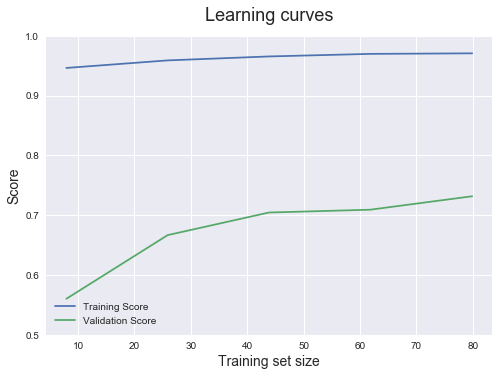

In [14]:
tts2.visual_tain_test_split_score(table)

In [15]:
estimator = RandomForestClassifier(n_estimators=10) #lets start from 10 trees
estimator.fit(X,y)
cv = 5
table = tts2.train_test_split_table_scores(estimator, X, y, cv=5)
table

,Train Percent,Test Percent,Split1,Split2,Split3,Split4,Split5,Training Scores Mean,Testing Scores Mean
0,7.92,92.080378,1.000000,1.000000,1.000000,1.000000,0.985075,0.997015,0.604003
1,25.89,74.113475,0.977169,0.995434,0.981735,0.990868,0.981735,0.985388,0.710428
2,43.85,56.146572,0.994609,0.997305,0.991914,0.986523,0.991914,0.992453,0.737633
3,61.82,38.179669,0.990440,0.988528,0.992352,0.992352,0.992352,0.991205,0.729342
4,79.91,20.094563,0.985207,0.986686,0.991124,0.986686,0.992604,0.988462,0.747010


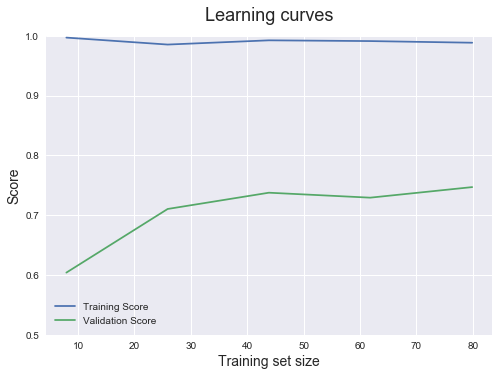

In [16]:
tts2.visual_tain_test_split_score(table)

Here you can see when we are using n_estimators=1000 (default), we see extreme overfitting, then we reduce n_estimators=5, this gives less overfitting and same test score, then we changed n_estimators = 10 this again led to overfitting and same test scores, this means the best split is 80/20 and the n_estimators should be kept low at around 5 (we will further verify this with GridSearch)


## Split train/test data 

In [17]:
X_train, X_test, y_train, y_test = sidra.train_data_test_data_split(X, y, test_size=0.2)

## Training the model
Using Gridsearch, first I am identifying the best possible params and then using them to train model

In [18]:
# Using GridSearchCV to find best params:
# Using the most important features to avoid overcomplicating hyperparameter selection
parameters = {
    'n_estimators'      : [2, 4, 6, 8, 10, 12], 
    #since default  = 1000 led to extreme overfitting and we have just 846 datapoints so lets keeps number of trees small
    'max_depth'         : [8, 9, 10, 11, 12, 19, 20], #high numbers can lead to overfitting
    'random_state'      : [0],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14], # high numbers can lead to underfitting
    'max_features': ['auto', 'sqrt', None],
    'criterion' :['gini', 'entropy']
}



clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
print (clf.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 0}


In [19]:
clf = RandomForestClassifier(criterion= 'entropy', 
                             max_depth= 9, 
                             max_features= 'auto',
                             min_samples_split= 2,
                             n_estimators= 10, 
                             random_state= 0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Testing Model, checking accuracy and drawing confusion matrix 

In [20]:
y_pred = sidra.test(clf, X_test)

In [21]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 77.05882352941177


### Converting numeric target and predict values back to original labels

In [22]:
y_test= sidra.untokenizing_testdata(y_test, definitions)
y_pred = sidra.untokenizing_prediction(y_pred, definitions)

## Analysis of missclassified points

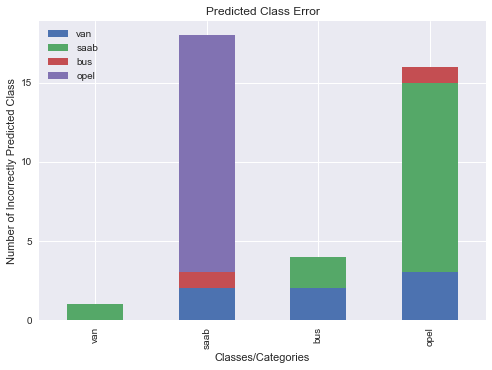

In [23]:
visual.missclassified_data_category_frquency(y_test, y_pred)

### Interpretation of the above graph
This graph can be thought of as "Graph of False Positives in Each Class". From the above graph, we can analyse that

A large number of incorrectly predicted datapoints are in Class: Saab, and datapoints that actually belonged to Class: Opel were incorrectly predicted to be of Class: Saab most often. After that the second class containing most False Positives is Class: Opel and interestingly here Class: Saab datapoints were incorrectly identified as Class:Opel the most. Seems like our model mixes Saab amd Opel and it is having a hard time differentiating the datapoints belonging to these 2 classes

====================== Confusion Matrix=====================


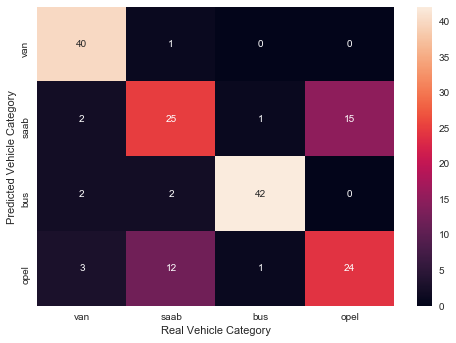

In [24]:
cm = sidra.create_confusion_matrix(y_test, y_pred)
sidra.display_confusion_matrix(cm)


In [25]:
sidra.display_classification_report(y_test,y_pred)

============== Summary of all evaluation metics ===============
              precision    recall  f1-score   support

         bus       0.95      0.91      0.93        46
        opel       0.62      0.60      0.61        40
        saab       0.62      0.58      0.60        43
         van       0.85      0.98      0.91        41

    accuracy                           0.77       170
   macro avg       0.76      0.77      0.76       170
weighted avg       0.77      0.77      0.77       170



### Conclusion:
In this version, I first used different models with default  hyperparameters to see which performs better on accuracy as well as F1 score, and then I tuned its parameter. The overall accuracy is 77 percent and I see no change in F1 score per class. I believe in next iteration, I should first optimize hyperparameters for each model and then compare accuracy and F1 score of these models